# Edge detection

This tutorial illustrates how edge detection is done using ...
- 1st order differential operators (e.g., Sobel operator)
- 2nd order differential operators (e.g., Laplacian)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.filters import laplace
from skimage.filters import gaussian

## Setting the stage
To illustrate how edge detection works, let's start by creating a simple demo image that has some obvious gradient properties. <br/>
We create a simple 10x10 B/w image that has a single edge located at the centre. Additionally, to obtain an image with a smooth gradient blur the image with a Gaussian.

In [52]:
I = np.zeros((100, 100), dtype=float)
I[:, 50:] = 1.
I = gaussian(I, sigma=5)

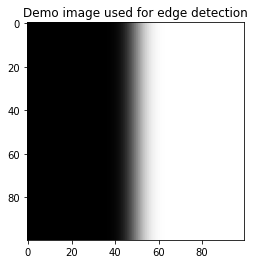

In [53]:
plt.title('Demo image used for edge detection')
plt.imshow(I, cmap='gray')

##  Compute the 1st and 2nd derivative of the sample image

Note that, the intensity values do not change along the columns. <br/>
Therefore, both, the 1st and the 2nd derivative will also be 0. For this reason we will only look at the changes along the rows.

In [54]:
# Obtain the 1st derivative using the Sobel operator
grad_I = sobel(I)
# Obtain the 2nd derivative using the Laplacian operator
grad2_I = laplace(I)

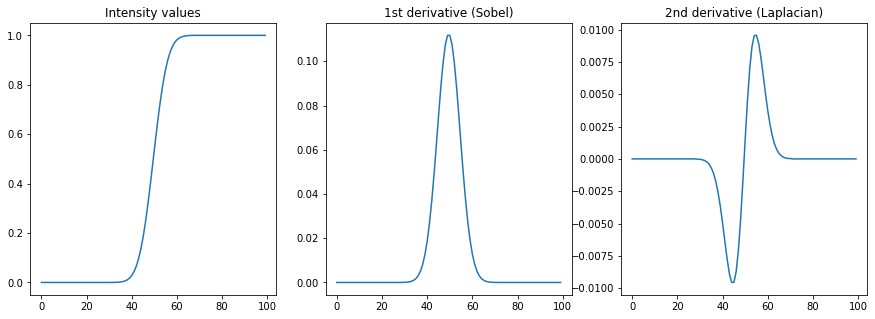

In [55]:
# Let's plot the 1st/2nd derivative along a row
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Intensity values')
plt.plot([i for i in range(100)], I[0, :])
plt.subplot(1, 3, 2)
plt.title('1st derivative (Sobel)')
plt.plot([i for i in range(100)], grad_I[0, :])
plt.subplot(1, 3, 3)
plt.title('2nd derivative (Laplacian)')
plt.plot([i for i in range(100)], grad2_I[0, :])

## Locating the edge

### 1st derivative

As can be seen in the previous figures, the edge occurs exactly at the point where the gradient is at its maximum. We can easily locate the edge by thresholding of the gradient magnitude image.

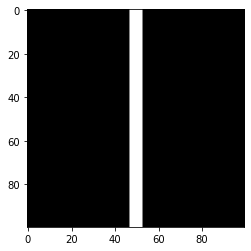

In [56]:
edge_mask = np.abs(grad_I)>0.09
edge_mask = edge_mask.astype(float)
plt.imshow(edge_mask, cmap='gray')

Unfortunately, finding a threshold that produces a thin line turns is quite tricky. <br/>
In general, this is one of the issues with 1st order edge detection --- The resulting edges tend to be thick.


### 2nd derivative

În case of the 2nd derivative, we find our edge exactly the point where the 2nd derivative changes its sign. <br/>
To localize the edge we therefore have to find the **zero-crossing**.

In [46]:
# The following code detects zero-crossings by comparing the signs of the neighbouring values
# Note that, the dimensionality decreases by one (hence, additional padding might be required if the 
# output size matters)
sign_mask = np.sign(grad2_I)
diff_x = sign_mask[:-1, :-1] - sign_mask[:-1, 1:] < 0
diff_y = sign_mask[:-1, :-1] - sign_mask[1:, :-1] < 0

edge_mask =  np.logical_or(diff_x, diff_y)

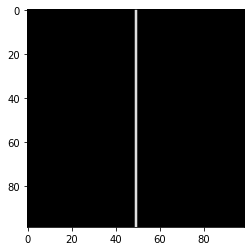

In [47]:
plt.imshow(edge_mask, cmap='gray')